In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'IPAexGothic'
import japanize_matplotlib

1 kcal/price
2 protain:carbohydorate
3 protain/price
index ['carbohydrate', 'fat', 'kcal', 'price', 'protain', 'sodium']

In [32]:
yoshinoya = pd.read_excel('beefbowl.xlsx', sheet_name='yoshinoya').set_index('Unnamed: 0').add_prefix('y_')
sukiya = pd.read_excel('beefbowl.xlsx', sheet_name='sukiya').set_index('Unnamed: 0').add_prefix('s_')
matuya = pd.read_excel('beefbowl.xlsx', sheet_name='matuya').set_index('Unnamed: 0').add_prefix('m_')

yoshinoya

,y_小盛,y_並盛,y_アタマの大盛,y_大盛,y_特盛
Unnamed: 0,,,,,
price,465.0,498.0,630.0,696.0,872.0
kcal,489.0,633.0,725.0,838.0,1022.0
protain,15.6,19.6,23.0,25.0,33.8
fat,19.6,23.6,28.8,29.0,44.2
carbohydrate,64.6,88.2,96.6,123.2,126.0
sodium,1.9,2.5,2.8,3.1,4.0


In [33]:
# ones_matrix = np.ones((6, 6))
# cov_matrix = np.cov(yoshinoya)
# corr_matrix = np.corrcoef(yoshinoya)

# # cov_matrix = 1 - cov_matrix
# # corr_matrix = 1 - corr_matrix

# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('corr')
# plt.show()

# cov_dataframe = pd.DataFrame(cov_matrix, columns=yoshinoya.T.columns, index=yoshinoya.T.columns)
# corr_dataframe = pd.DataFrame(corr_matrix, columns=yoshinoya.T.columns, index=yoshinoya.T.columns)

# cov_dataframe
# corr_dataframe


In [34]:
# ones_matrix = np.ones((6, 6))
# cov_matrix = np.cov(sukiya)
# corr_matrix = np.corrcoef(sukiya)

# # cov_matrix = 1 - cov_matrix
# # corr_matrix = 1 - corr_matrix

# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('corr')
# plt.show()

# cov_dataframe = pd.DataFrame(cov_matrix, columns=sukiya.T.columns, index=sukiya.T.columns)
# corr_dataframe = pd.DataFrame(corr_matrix, columns=sukiya.T.columns, index=sukiya.T.columns)

# cov_dataframe
# corr_dataframe

In [35]:
df = yoshinoya
df = df.join(sukiya, how='outer')
df = df.join(matuya, how='outer')

In [36]:
# per price
price_dataframe = df.loc['price']
price_array = price_dataframe.to_numpy()
price_dataframe
print(price_array)

df_per_price = df.drop('price')

for i in range(len(df_per_price.columns)):
    for j in range(len(df_per_price.index)):
        df_per_price.iloc[j, i] /= price_array[i]

# for index, row in df_per_price.iterrows():
#     print(index)
#     plt.bar(row.index, row.values)
#     plt.title(f'{index}')
#     plt.show()


[465. 498. 630. 696. 872. 380. 430. 580. 630. 780. 930. 400. 430. 580.
 630. 790.]


<Axes: title={'center': 'kcal/price'}>

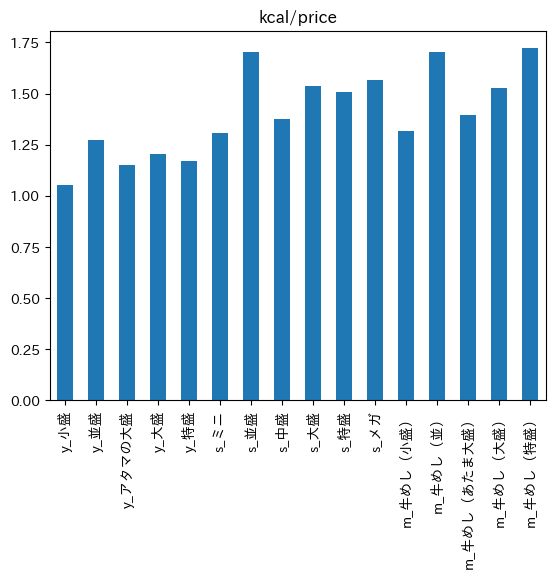

In [37]:
df_per_price.loc['kcal'].T.plot.bar(title='kcal/price')

<Axes: title={'center': 'protain/price'}>

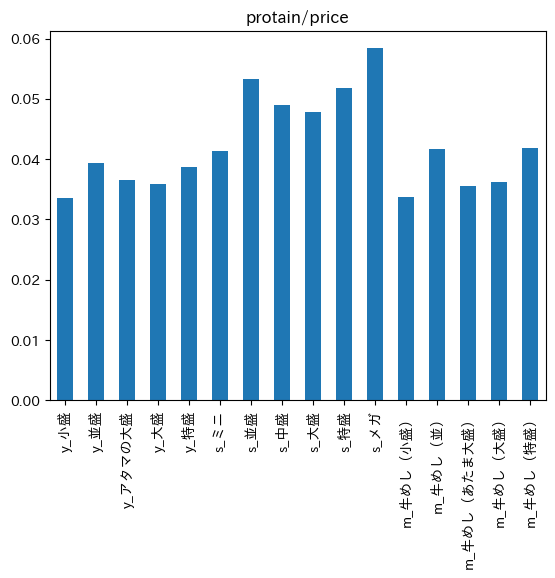

In [38]:
df_per_price.loc['protain'].T.plot.bar(title='protain/price')

<Axes: title={'center': 'carbohydrate/price'}>

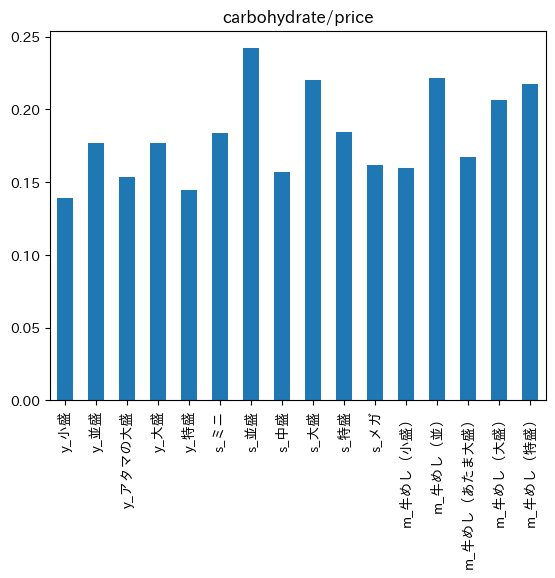

In [39]:
df_per_price.loc['carbohydrate'].T.plot.bar(title='carbohydrate/price')

<Axes: title={'center': 'fat/price'}>

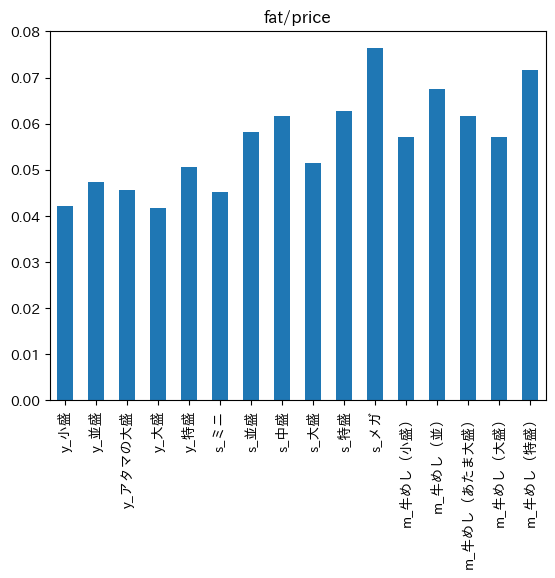

In [43]:
df_per_price.loc['fat'].T.plot.bar(title='fat/price')

<Axes: title={'center': 'sodium/price'}>

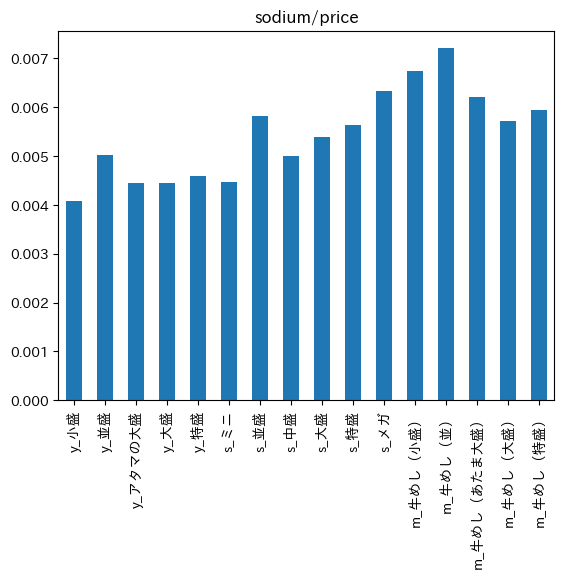

In [44]:
df_per_price.loc['sodium'].T.plot.bar(title='sodium/price')

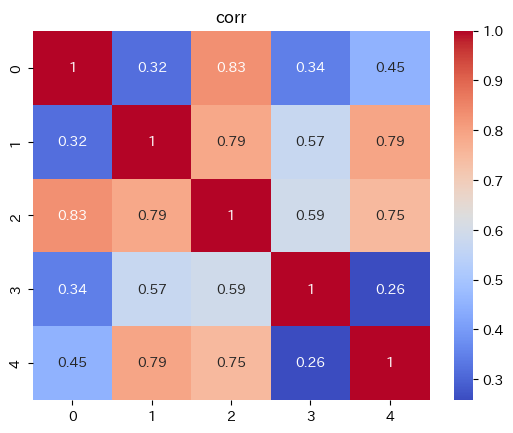

Unnamed: 0,carbohydrate,fat,kcal,protain,sodium
Unnamed: 0,,,,,
carbohydrate,1.000000,0.316619,0.831209,0.344973,0.451767
fat,0.316619,1.000000,0.787615,0.573383,0.791329
kcal,0.831209,0.787615,1.000000,0.592127,0.747944
protain,0.344973,0.573383,0.592127,1.000000,0.257715
sodium,0.451767,0.791329,0.747944,0.257715,1.000000


In [40]:
ones_matrix = np.ones((4, 4))
cov_matrix = np.cov(df_per_price)
corr_matrix = np.corrcoef(df_per_price)

# cov_matrix = 1 - cov_matrix
# corr_matrix = 1 - corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('corr')
plt.show()

cov_dataframe = pd.DataFrame(cov_matrix, columns=df_per_price.T.columns, index=df_per_price.T.columns)
corr_dataframe = pd.DataFrame(corr_matrix, columns=df_per_price.T.columns, index=df_per_price.T.columns)

cov_dataframe
corr_dataframe

[ 489.  633.  725.  838. 1022.  496.  732.  798.  967. 1176. 1458.  527.
  732.  810.  961. 1360.]
carbohydrate


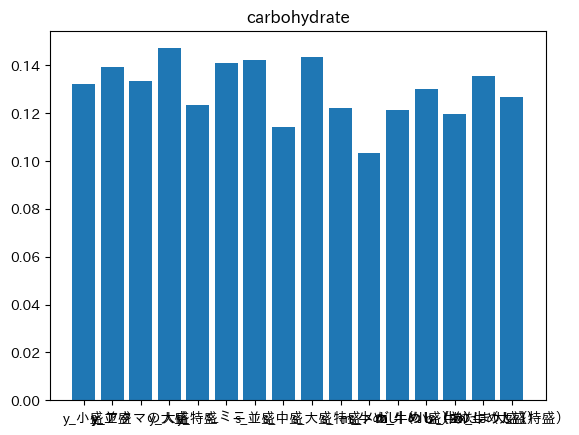

fat


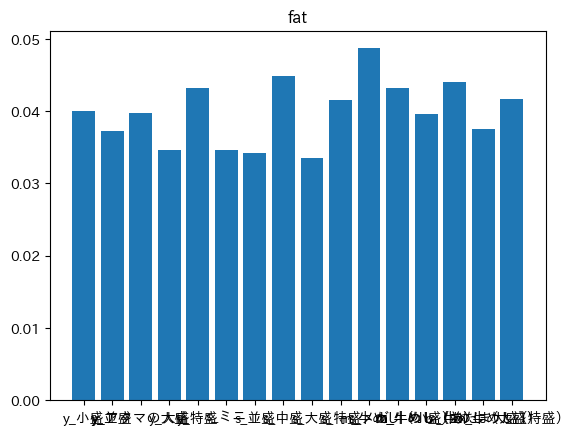

protain


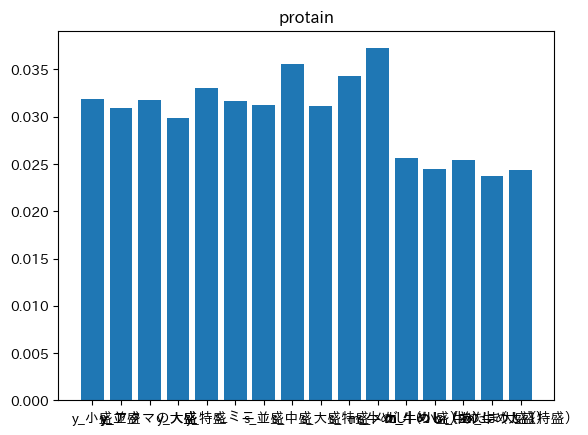

sodium


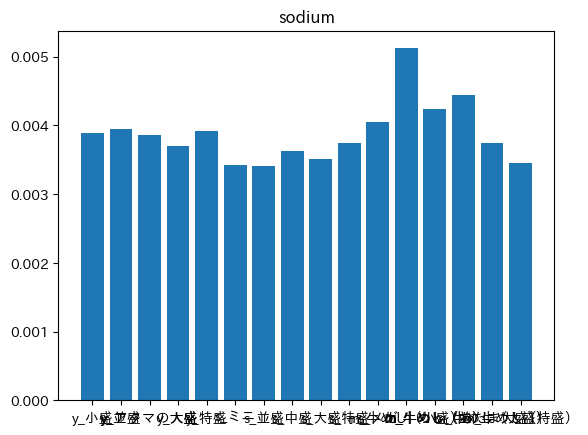

In [41]:
kcal_dataframe = df.loc['kcal']
kcal_array = kcal_dataframe.to_numpy()
kcal_dataframe
print(kcal_array)

df_per_kcal = df.drop(['kcal', 'price'])

for i in range(len(df_per_kcal.columns)):
    for j in range(len(df_per_kcal.index)):
        df_per_kcal.iloc[j, i] /= kcal_array[i]
df_per_kcal

for index, row in df_per_kcal.iterrows():
    print(index)
    plt.bar(row.index, row.values)
    plt.title(f'{index}')
    plt.show()

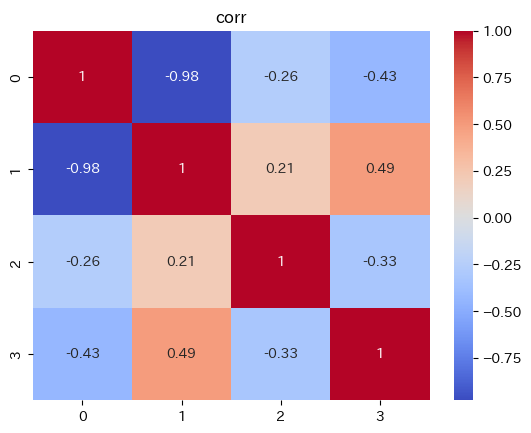

Unnamed: 0,carbohydrate,fat,protain,sodium
Unnamed: 0,,,,
carbohydrate,1.000000,-0.977664,-0.264857,-0.430567
fat,-0.977664,1.000000,0.206831,0.494326
protain,-0.264857,0.206831,1.000000,-0.327678
sodium,-0.430567,0.494326,-0.327678,1.000000


In [42]:
ones_matrix = np.ones((4, 4))
cov_matrix = np.cov(df_per_kcal)
corr_matrix = np.corrcoef(df_per_kcal)

# cov_matrix = 1 - cov_matrix
# corr_matrix = 1 - corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('corr')
plt.show()

cov_dataframe = pd.DataFrame(cov_matrix, columns=df_per_kcal.T.columns, index=df_per_kcal.T.columns)
corr_dataframe = pd.DataFrame(corr_matrix, columns=df_per_kcal.T.columns, index=df_per_kcal.T.columns)

cov_dataframe
corr_dataframe